<a href="https://colab.research.google.com/github/Puneeth-Abhishek-6622/Speech-Emotion-Recognition-/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

dataset_path = "/content/drive/MyDrive/telugu"
output_path = "/content/drive/MyDrive/telugu_100_samples"

In [ ]:
import os
import random
import shutil

# Define source dataset directory


# Ensure output directory exists
os.makedirs(output_path, exist_ok=True)

# Emotion categories and corresponding folders
emotions = ["angry", "happy", "neutral", "sad"]

# Select and rename files
for emotion in emotions:
    emotion_path = os.path.join(dataset_path, emotion)
    output_emotion_path = os.path.join(output_path, emotion)
    os.makedirs(output_emotion_path, exist_ok=True)

    # Get all audio files from the emotion folder
    audio_files = [f for f in os.listdir(emotion_path) if f.endswith(".wav")]

    # Randomly pick 25 samples
    selected_files = random.sample(audio_files, 25)

    # Copy and rename files
    for i, file in enumerate(selected_files):
        src = os.path.join(emotion_path, file)
        dest = os.path.join(output_emotion_path, f"{emotion}_{i+1}.wav")
        shutil.copy(src, dest)

print("Sample selection and renaming completed successfully!")


Sample selection and renaming completed successfully!


In [ ]:
samples_100_path = "/content/drive/MyDrive/telugu_100_samples"

loading the model

In [ ]:
from tensorflow.keras.models import load_model

# Load your trained model (update path if necessary)a
model = load_model("/content/drive/MyDrive/speech_emotion_recognition_model.h5")

In [ ]:
model.input_shape

(None, 170, 1)

Feature extraction

In [ ]:
import subprocess
import os

samples_100_path = "/content/drive/MyDrive/telugu_100_samples"

for emotion in ["angry", "happy", "neutral", "sad"]:
    folder_path = os.path.join(samples_100_path, emotion)
    for file in os.listdir(folder_path)[:3]:  # Check 3 random files from each folder
        if file.endswith(".wav"):
            file_path = os.path.join(folder_path, file)
            output = subprocess.run(["file", file_path], capture_output=True, text=True)
            print(f"{file}: {output.stdout}")


angry_1.wav: /content/drive/MyDrive/telugu_100_samples/angry/angry_1.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, stereo 44100 Hz

angry_2.wav: /content/drive/MyDrive/telugu_100_samples/angry/angry_2.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, stereo 44100 Hz

angry_3.wav: /content/drive/MyDrive/telugu_100_samples/angry/angry_3.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, stereo 44100 Hz

happy_1.wav: /content/drive/MyDrive/telugu_100_samples/happy/happy_1.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, stereo 44100 Hz

happy_2.wav: /content/drive/MyDrive/telugu_100_samples/happy/happy_2.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, stereo 44100 Hz

happy_3.wav: /content/drive/MyDrive/telugu_100_samples/happy/happy_3.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, stereo 44100 Hz

neutral_1.wav: /content/drive/MyDrive/telugu_100_samples/neutral/neutral_1.wav: RI

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd

# Path to the Telugu dataset
samples_100_path = "/content/drive/MyDrive/telugu_100_samples"

# Feature extraction function
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None, mono=True)  # Force mono conversion

    # Extract features
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    rmse = np.mean(librosa.feature.rms(y=y))
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128), axis=1)

    # Combine features
    features = np.hstack([mfccs, mel, zcr, rmse])
    return features


# Prepare feature list
columns = [f"MFCC_{i}" for i in range(40)] + [f"Mel_{i}" for i in range(128)] + ["ZCR", "RMSE", "Emotion"]
feature_list = []

# Emotion mapping
emotion_mapping = {"angry": 0, "happy": 2, "neutral": 3, "sad": 4}

# Extract features from each file
for emotion, label in emotion_mapping.items():
    emotion_folder = os.path.join(samples_100_path, emotion)

    if os.path.isdir(emotion_folder):
        for file in os.listdir(emotion_folder):
            if file.endswith(".wav"):
                file_path = os.path.join(emotion_folder, file)
                features = extract_features(file_path)
                feature_list.append(np.append(features, label))

# Convert to DataFrame for display
df = pd.DataFrame(feature_list, columns=columns)
print(df.head())


       MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0 -451.770477  125.401505  -6.568606  11.056602   6.406577  10.755925   
1 -456.214783   79.479012  -4.426315  13.183619   0.720886  -0.389446   
2 -397.618469  146.652527  -4.564551   7.107460  -1.867400  -2.385998   
3 -393.996552   80.909439 -14.406309  16.844835  -6.138856   1.279568   
4 -425.589691  129.595932 -14.842962   0.656388  24.115511  16.746340   

      MFCC_6     MFCC_7     MFCC_8    MFCC_9  ...       Mel_121       Mel_122  \
0  -6.820755  -7.985391   1.416457 -7.858004  ...  7.495101e-07  5.333712e-07   
1 -12.369184   5.427841  -9.904633 -8.196599  ...  7.653560e-06  4.657792e-06   
2  -3.541281 -10.616662  -9.923225 -9.457804  ...  1.477854e-06  1.243694e-06   
3 -12.273586   5.856714 -10.566035 -6.233613  ...  2.554559e-05  1.368124e-05   
4 -10.320886  -7.972513   6.024076 -6.638177  ...  7.173161e-07  5.801966e-07   

        Mel_123       Mel_124       Mel_125       Mel_126       Mel_127  \

Normalizing the features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target labels (y)
X = df.drop(columns=['Emotion'])  # Drop the 'Emotion' column
y = df['Emotion']  # Store the labels separately

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit & transform the features

# Convert back to DataFrame (optional, for better readability)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Emotion'] = y  # Re-add the target column

# Print sample normalized features
print(f"Sample normalized features (first row): {df_scaled.iloc[0].values}")


Sample normalized features (first row): [-0.1223412  -0.06397817 -0.32682456 -0.10813421 -0.07091426  0.40064016
  0.15063774 -0.71610291  0.90890449 -0.24666626 -1.99080714  1.24915513
  0.41235684 -1.54126232  1.74571386 -0.28010673 -1.11512896  0.23770208
  0.76459902  0.21989894 -0.75792446  0.1083842   0.54314169 -0.49449505
 -0.85943082 -0.7275857  -0.35336306 -1.6254394  -1.75677078 -0.87427821
 -1.17401204 -1.26937448 -0.4353445  -0.24462376  0.08039775  0.53742774
  0.30011505  0.57915934  0.60898312  0.8122854  -0.24076042 -0.26809857
 -0.40264178 -0.46028123 -0.50780949 -0.48086264 -0.38557589 -0.46502825
 -0.58752374 -0.59497994 -0.62562704 -0.37115737 -0.29354787 -0.13603633
  0.11308985 -0.10291066 -0.37133718 -0.42970406 -0.50180314 -0.54371271
 -0.43417227 -0.38212119 -0.43644888 -0.40316396 -0.26689922 -0.21361392
 -0.1836274  -0.17844015 -0.38975607 -0.37230518 -0.27968918 -0.2778928
 -0.34755936 -0.2926509  -0.32816697 -0.14233633  0.59476685 -0.21958485
 -0.31609714

In [ ]:
import tensorflow as tf
import numpy as np



# Extract features (excluding 'Emotion' column)
X_test = df_scaled.drop(columns=['Emotion']).values  # Convert to NumPy array

# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to class labels (assuming softmax activation in last layer)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print some sample predictions
for i in range(5):
    print(f"Predicted: {y_pred_labels[i]}, Actual: {df_scaled['Emotion'].iloc[i]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted: 2, Actual: 0.0
Predicted: 0, Actual: 0.0
Predicted: 2, Actual: 0.0
Predicted: 0, Actual: 0.0
Predicted: 2, Actual: 0.0


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
Model Accuracy: 0.2828


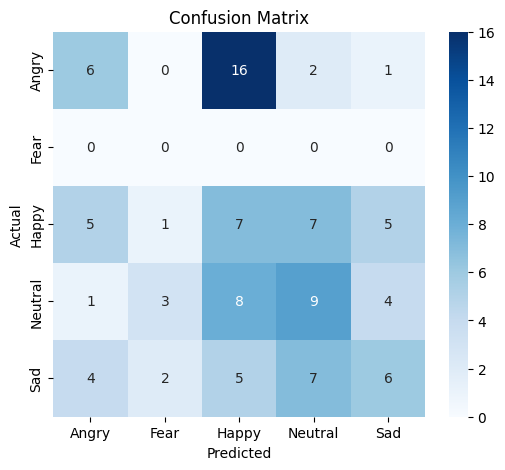

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/speech_emotion_recognition_model.h5')

# Extract features (excluding 'Emotion' column) and true labels
X_test = df_scaled.drop(columns=['Emotion']).values  # Convert to NumPy array
y_true = df_scaled['Emotion'].values  # True labels

# Reshape if necessary (for CNNs, LSTMs)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # (samples, features, 1)

# Make predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred_labels)
print(f"Model Accuracy: {accuracy:.4f}")

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Angry", "Fear", "Happy", "Neutral", "Sad"],
            yticklabels=["Angry", "Fear", "Happy", "Neutral", "Sad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

df_urdu = pd.read_csv('/content/urdu_features (1).csv')

In [ ]:
df_telugu

,MFCC_0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,Mel_121,Mel_122,Mel_123,Mel_124,Mel_125,Mel_126,Mel_127,ZCR,RMSE,Emotion
0,-451.770477,125.401505,-6.568606,11.056602,6.406577,10.755925,-6.820755,-7.985391,1.416457,-7.858004,...,7.495101e-07,5.333712e-07,4.379074e-07,3.609115e-07,3.312086e-07,3.408403e-07,3.576627e-07,0.083168,0.021588,0.0
1,-456.214783,79.479012,-4.426315,13.183619,0.720886,-0.389446,-12.369184,5.427841,-9.904633,-8.196599,...,7.653560e-06,4.657792e-06,2.424056e-06,1.123659e-06,5.963147e-07,4.038356e-07,3.733854e-07,0.134592,0.027527,0.0
2,-397.618469,146.652527,-4.564551,7.107460,-1.867400,-2.385998,-3.541281,-10.616662,-9.923225,-9.457804,...,1.477854e-06,1.243694e-06,1.137109e-06,9.473172e-07,7.156891e-07,5.065493e-07,4.207546e-07,0.042705,0.053750,0.0
3,-393.996552,80.909439,-14.406309,16.844835,-6.138856,1.279568,-12.273586,5.856714,-10.566035,-6.233613,...,2.554559e-05,1.368124e-05,5.646461e-06,2.547619e-06,1.029205e-06,5.530609e-07,4.058442e-07,0.069046,0.049145,0.0
4,-425.589691,129.595932,-14.842962,0.656388,24.115511,16.746340,-10.320886,-7.972513,6.024076,-6.638177,...,7.173161e-07,5.801966e-07,6.345534e-07,5.022806e-07,3.887772e-07,3.707602e-07,3.731365e-07,0.097516,0.041012,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,-530.350647,89.601379,14.568847,11.663843,25.600048,19.629211,4.804130,3.718592,3.800054,-0.711298,...,3.637163e-07,3.848422e-07,4.206201e-07,4.248003e-07,3.885545e-07,3.887166e-07,3.933219e-07,0.062810,0.021621,4.0
95,-545.323975,101.047913,8.252698,19.434282,9.448726,7.153697,0.392351,6.454350,-7.224638,-4.556142,...,5.455431e-07,4.565220e-07,4.271233e-07,4.198622e-07,4.108224e-07,4.139658e-07,4.240384e-07,0.131837,0.012070,4.0
96,-495.108307,118.476326,25.554132,8.264226,-10.190436,-1.315550,-11.055704,7.437700,4.393661,-8.949648,...,1.678945e-06,1.546461e-06,1.311808e-06,1.092039e-06,8.692281e-07,6.393381e-07,5.165272e-07,0.105497,0.022014,4.0
97,-438.235565,113.402489,10.062870,9.229111,-2.260169,12.786985,4.176837,11.107607,-1.402944,-3.252888,...,9.122193e-06,6.388183e-06,4.022309e-06,1.965123e-06,1.363879e-06,1.115790e-06,9.956919e-07,0.090029,0.023515,4.0


In [ ]:
df_urdu

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0.027212,0.089045,-212.094040,103.084801,5.877360,29.330194,-14.200040,-1.530957,-14.415684,-8.065802,...,-32.778183,-32.893871,-32.850548,-33.448025,-32.460217,-32.790905,-34.209415,-35.579662,-39.611042,-47.809189
1,0.076894,0.047260,-284.298950,117.531891,-4.152894,36.310436,-12.609140,-10.402150,-12.960434,0.817922,...,-44.772854,-44.362682,-44.045639,-43.823029,-43.765163,-43.059105,-42.722439,-42.711994,-45.443436,-53.096840
2,0.108274,0.052535,-257.071838,77.624680,3.989719,32.096325,-23.297579,-6.348145,-15.545006,3.134835,...,-38.072880,-37.987823,-36.925255,-35.906223,-35.823029,-35.486481,-35.323261,-35.555763,-40.208637,-50.983395
3,0.096155,0.079648,-216.198318,96.266113,-22.911522,14.344508,-24.100357,-10.239723,-13.829447,-1.528905,...,-36.217808,-36.660088,-35.854553,-34.306492,-33.752747,-34.438503,-35.839573,-36.179546,-39.149345,-49.121452
4,0.086868,0.086125,-191.508820,105.863968,-24.333717,52.385151,-36.413731,-11.489659,-12.525518,4.427021,...,-41.712841,-42.195370,-41.998127,-41.720638,-41.966511,-41.982346,-41.837673,-41.801418,-44.904602,-51.640461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.058485,0.046002,-280.537598,131.509155,1.812752,48.039970,-12.278266,-7.286283,-20.931225,-19.666849,...,-38.658978,-38.328499,-40.344341,-43.723774,-46.883308,-49.331402,-50.964691,-53.255573,-54.536667,-59.147556
171,0.088394,0.059779,-254.259659,117.884796,7.767907,38.597839,-12.472826,-2.502173,-20.531427,-13.769790,...,-37.338696,-37.213993,-37.304913,-38.315540,-39.671803,-41.509956,-43.873562,-46.939751,-49.660324,-53.452290
172,0.088720,0.036730,-319.412933,104.974335,17.298574,29.643667,-4.962946,-7.054752,-15.702971,-12.255998,...,-38.352154,-38.704742,-39.638996,-40.659985,-41.958649,-42.588020,-44.062176,-44.668194,-46.879173,-53.116421
173,0.099412,0.050146,-264.238068,105.453209,14.506840,21.936625,-9.341445,-0.170471,-23.972284,-8.634872,...,-35.180416,-35.421211,-35.526829,-36.357323,-37.487923,-38.858471,-40.136635,-41.993793,-45.143166,-50.701794


In [ ]:
df_urdu = pd.read_csv("/content/urdu_data_with_headers.csv")
telugu_df = pd.read_csv("/content/telugu_fixed.csv")

In [ ]:
print(telugu_df.shape)
print(df_urdu.shape)

(99, 170)
(99, 170)


In [ ]:
import pandas as pd
import numpy as np

# Assume df_urdu and df_telugu contain extracted features for both languages
common_features = ['ZCR', 'RMSE'] + [f'MFCC_{i}' for i in range(40)] + [f'Mel_{i}' for i in range(128)]

# Compute mean & variance for each feature
urdu_stats = df_urdu[common_features].agg(['mean', 'var'])
telugu_stats = telugu_df[common_features].agg(['mean', 'var'])

# Compute absolute difference in means
mean_diff = abs(urdu_stats.loc['mean'] - telugu_stats.loc['mean'])

# Define a threshold for universal features (adjust based on your needs)
threshold = 0.1  # Example: Set this based on your data distribution

# Identify universal features (low mean difference)
universal_features = mean_diff[mean_diff < threshold].index.tolist()

print("Universal Features:", universal_features)


Universal Features: ['MFCC_18', 'MFCC_20']


- Universal features are those that do not vary significantly between the two datasets.
- These features might be language-agnostic and could be more useful for cross-language generalization.
- If we are building a model that needs to work on both Urdu and Telugu speech data, focusing on these universal features might improve transferability.

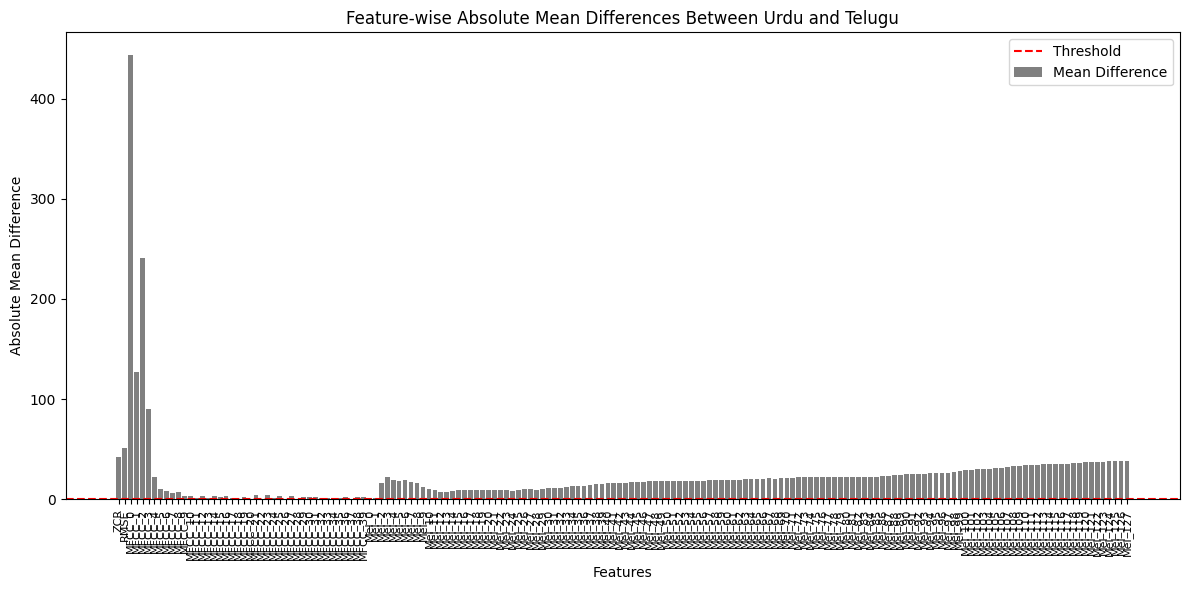

Universal Features (2): ['MFCC_18', 'MFCC_20']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_urdu and df_telugu contain extracted features for both languages
common_features = ['ZCR', 'RMSE'] + [f'MFCC_{i}' for i in range(40)] + [f'Mel_{i}' for i in range(128)]

# Compute mean values for both datasets
urdu_means = df_urdu[common_features].mean()
telugu_means = telugu_df[common_features].mean()

# Compute absolute mean differences
mean_diff = abs(urdu_means - telugu_means)

# Define a threshold (adjust if needed)
threshold = 0.1

# Identify universal features (below threshold)
universal_features = mean_diff[mean_diff < threshold].index.tolist()

# Plot the absolute mean differences
plt.figure(figsize=(12, 6))
plt.bar(mean_diff.index, mean_diff.values, color='gray', label="Mean Difference")
plt.axhline(y=threshold, color='r', linestyle='dashed', label="Threshold")
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Features")
plt.ylabel("Absolute Mean Difference")
plt.title("Feature-wise Absolute Mean Differences Between Urdu and Telugu")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Universal Features ({len(universal_features)}):", universal_features)
